# Thompson Sampling with Soft Constraints: 
# Finite-Time Analysis and Regret Bounds

In [4]:
import numpy as np
from matplotlib import pyplot as plt

# Load Data

In [27]:
data = np.load('results/edX_eta0.50_T1000_N4.npy', allow_pickle=True)[()]

T = data['T']
N = data['N']
target_success_prob = data['constraint']

stationay_opt_reward = data['stationay_opt_reward']#0.0139

In [44]:
cum_constraint = np.tile( target_success_prob * np.arange( 0, T, 1 ), [ N, 1 ] )
cum_opt_reward = np.tile( stationay_opt_reward * np.arange( 0, T, 1 ), [ N, 1 ] )

lincon_kl_ucb_cum_reward = np.cumsum( data['lincon_kl_ucb_reward_values'], axis = 1 )
lincon_ts_cum_reward     = np.cumsum( data['lincon_ts_reward_values'], axis = 1 )

lincon_kl_ucb_cum_violation = np.maximum( 0.0, cum_constraint - np.cumsum( data['lincon_kl_ucb_reward_events'], axis=1 ) )
lincon_ts_cum_violation     = np.maximum( 0.0, cum_constraint - np.cumsum( data['lincon_ts_reward_events'], axis=1 ) )

lincon_kl_ucb_cum_regret = np.maximum(0.0, cum_opt_reward - lincon_kl_ucb_cum_reward)
lincon_ts_cum_regret     = np.maximum(0.0, cum_opt_reward - lincon_ts_cum_reward)

# Plot Results

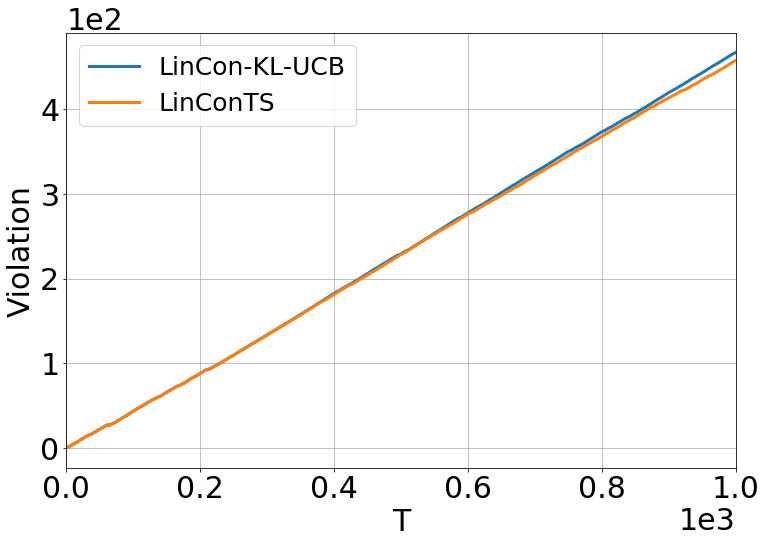

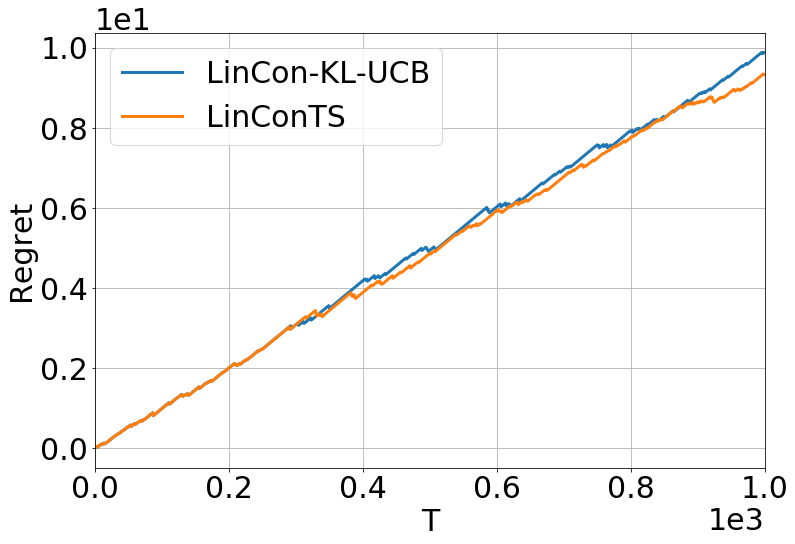

In [51]:
plt.rcParams.update({'font.size': 30, 
                     'lines.linewidth' : 3,
                     'lines.markersize': 20})


#------------------------------------
# Expected Violation
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])
#plt.ylim([0, 5000])

x_ticks = np.arange(0, T)

plt.plot(x_ticks, np.mean( lincon_kl_ucb_cum_violation, axis=0)[offset:])
plt.plot(x_ticks, np.mean( lincon_ts_cum_violation, axis=0)[offset:])

plt.legend(['LinCon-KL-UCB', 'LinConTS'], loc='upper left', fontsize=25)
plt.xlabel('T')
plt.ylabel('Violation')

plt.show()

#------------------------------------
# Expected Regret
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])
#plt.ylim([0, 2000])

x_ticks = np.arange(0, T)
samples = np.arange(0, T, sampling_interval)

plt.plot(x_ticks, np.mean( lincon_kl_ucb_cum_regret, axis=0 ) )
plt.plot(x_ticks, np.mean( lincon_ts_cum_regret, axis=0 ) )

plt.legend(['LinCon-KL-UCB', 'LinConTS'], loc='upper left')
plt.xlabel('T')
plt.ylabel('Regret')

plt.show()

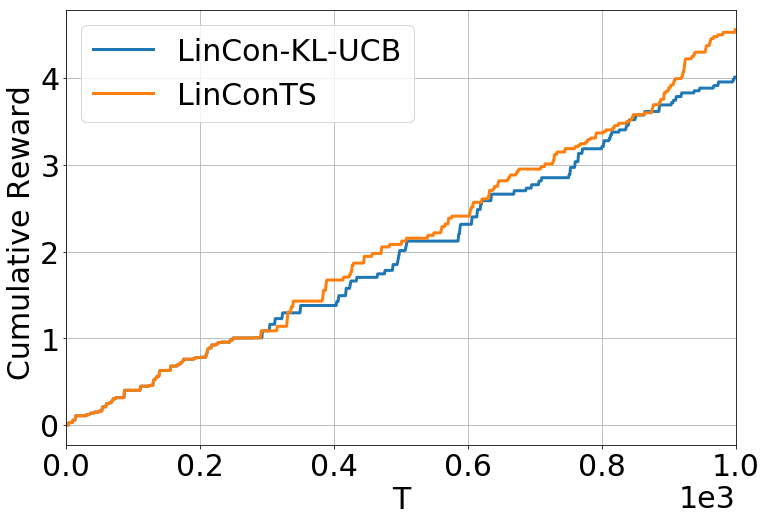

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


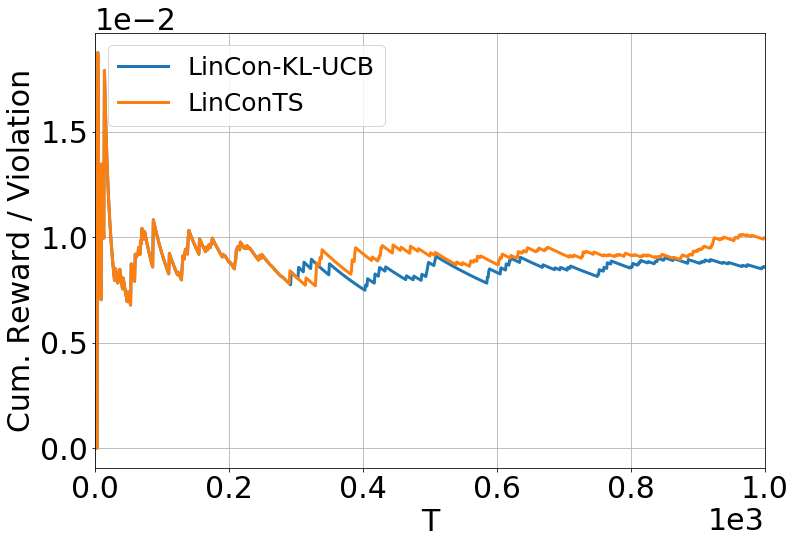

In [50]:
#------------------------------------
# Expected Reward
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])
#plt.ylim([0, 2000])

x_ticks = np.arange(0, T)

#plt.plot(x_ticks[samples], con_ucb_cum_reward[samples], 'k-v')
plt.plot(x_ticks, np.mean( lincon_kl_ucb_cum_reward, axis=0 ) )
plt.plot(x_ticks, np.mean( lincon_ts_cum_reward, axis=0 ) )

plt.legend(['LinCon-KL-UCB', 'LinConTS'], loc='upper left')
plt.xlabel('T')
plt.ylabel('Cumulative Reward ')

plt.show()

#------------------------------------
# Expected Reward / Expected Violation
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])

offset = 0
x_ticks = np.arange(offset, T)

plt.plot(x_ticks, np.divide( np.mean( lincon_kl_ucb_cum_reward, axis=0)[offset:], 
                             np.mean( lincon_kl_ucb_cum_violation, axis=0)[offset:] ) )
plt.plot(x_ticks, np.divide( np.mean( lincon_ts_cum_reward, axis=0)[offset:], 
                             np.mean( lincon_ts_cum_violation, axis=0)[offset:] ) )

plt.legend(['LinCon-KL-UCB', 'LinConTS'], loc='upper left', fontsize=25)
plt.xlabel('T')
plt.ylabel('Cum. Reward / Violation')

plt.show()

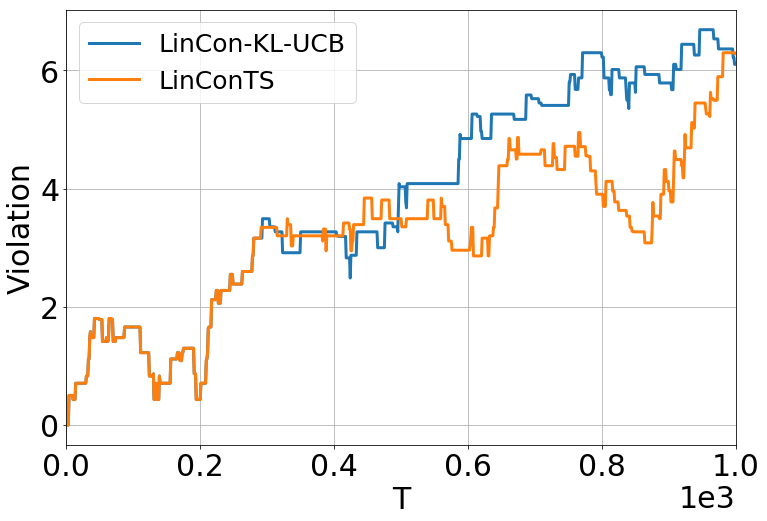

In [43]:
#------------------------------------
# STDDEV Violation
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])
#plt.ylim([0, 5000])

x_ticks = np.arange(0, T)

plt.plot(x_ticks, np.std( lincon_kl_ucb_cum_violation, axis=0)[offset:])
plt.plot(x_ticks, np.std( lincon_ts_cum_violation, axis=0)[offset:])

plt.legend(['LinCon-KL-UCB', 'LinConTS'], loc='upper left', fontsize=25)
plt.xlabel('T')
plt.ylabel('SViolation')

plt.show()